# Matplotlib Problem Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Below is the temperature in degrees Celsius for this day (July 10) in Boston from 1961 to 2010. Plot the temperature on the Y-Axis

In [2]:
temp_boston = [17.8, 22.8, 17.5, 16.4, 23.35, 25.3, 27.25, 24.45, 22.5, 23.6, 26.7, 22.75, 21.95, 26.4,
23.05, 22.5, 21.1, 26.1, 23.9, 20.25, 27.8, 23.9, 21.7, 19.7, 25.0, 21.4, 21.1, 27.8, 22.25, 27.25, 
23.35, 25.0, 30.0, 25.8, 23.6, 22.5,19.15, 22.8, 23.6, 25.0, 20.8, 21.4, 18.6, 23.05, 25.0, 25.0,
18.35, 25.3, 18.6]

Text(0.5, 1.0, 'July 10 Boston Temperature')

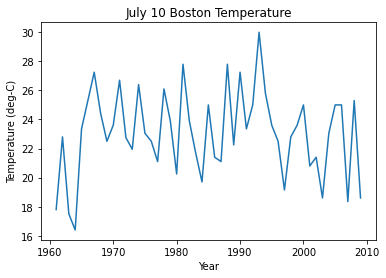

In [19]:
x = np.arange(1961, 2010)
plt.plot(x, temp_boston)
plt.xlabel("Year")
plt.ylabel("Temperature (deg-C)")
plt.title("July 10 Boston Temperature")

#### Below is the temperature in degrees Celsius for this day (July 10) in New York from 1961 to 2010. Plot the temperatures of New York and Boston on the same graph in different colors

In [15]:
temp_new_york =[23.35, 25.25, 20.25, 22.25, 25.85, 25.85, 25.55, 24.2, 22.5, 23.9, 28.3, 22.8, 26.7,
29.7, 23.6, 22.8, 23.05, 26.7, 20.3, 23.65, 28.05, 25.0, 21.4, 21.35, 26.1, 25.25, 28.35, 25.85, 27.5,
26.4, 21.7, 27.2, 32.25, 28.3, 22.5, 23.05, 22.8, 25.0, 24.7, 27.5, 25.85, 24.45, 20.0, 24.15, 26.95,
22.5, 25.85, 27.25, 19.4]

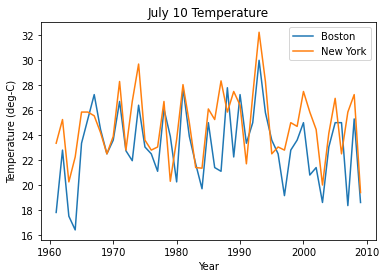

In [16]:
plt.plot(x, temp_boston, label="Boston")
plt.plot(x, temp_new_york, label="New York")
plt.xlabel("Year")
plt.ylabel("Temperature (deg-C)")
plt.title("July 10 Temperature")
plt.legend()

#### Plot the temperatures of New York and Boston on different graphs in the same figure¶

Text(0.5, 1.0, 'July 10 New York Temperature')

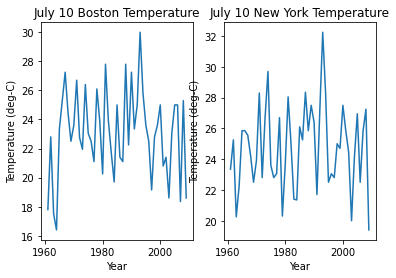

In [18]:
plt.subplot(1, 2, 1)
plt.plot(x, temp_boston)
plt.xlabel("Year")
plt.ylabel("Temperature (deg-C)")
plt.title("July 10 Boston Temperature")

plt.subplot(1, 2, 2)
plt.plot(x, temp_new_york)
plt.xlabel("Year")
plt.ylabel("Temperature (deg-C)")
plt.title("July 10 New York Temperature")

### Univariate Analysis:

In [23]:
"""Let's revisit the Dataset_1 again. Read the csv file https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv into a dataframe
and print the first 7 rows"""

## YOUR CODE HERE

data = pd.read_csv("https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv")
data.head(7)

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,TotalFat,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,114.52,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,178.85,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,14.99,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,127.03,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,33.87,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1
5,6,6,2,23,1,1,6,6,97.82,205.70,51.24,527.91,3226.97,32.13,59.8,158.9,23.68,566,2,2,2
6,7,5,2,53,3,3,1,6,34.59,227.03,28.33,33.50,5367.00,15.65,69.9,164.2,25.93,897,2,2,5


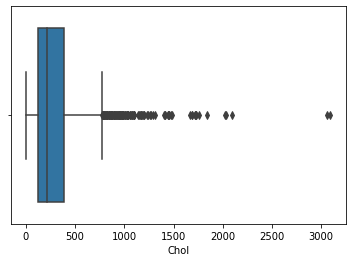

In [34]:
"""Conduct a Univariate Analysis of the participants' Cholesterol. What is noticeable about it? Create a function
that makes the participants' Cholesterol more Normal and create two visualizations, 
one before the Chol data is modified, and one after Chol data is nmodified to be more Normal than before."""

## YOUR CODE HERE
sns.boxplot(data.Chol)

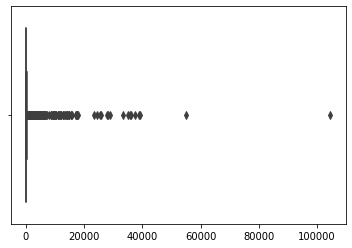

In [54]:
def more_Normal(dataframe, column):
  # Removes entries whose squared error is greater than 2 standard deviations away from the mean 
  return dataframe[np.square(dataframe[column]-dataframe[column].mean()) <= (2 * dataframe[column].std())]

sns.boxplot(more_Normal(data,"Chol"))

(array([[20.,  1.,  0., ...,  0.,  0.,  0.],
        [20.,  1.,  0., ...,  0.,  0.,  0.],
        [20.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [21.,  0.,  0., ...,  0.,  0.,  0.],
        [21.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  1.,  0., ...,  0.,  0.,  0.]]),
 array([     0.  ,  10454.92,  20909.84,  31364.76,  41819.68,  52274.6 ,
         62729.52,  73184.44,  83639.36,  94094.28, 104549.2 ]),
 <a list of 237 Lists of Patches objects>)

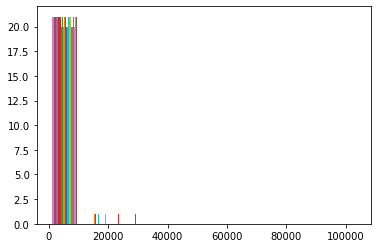

In [53]:
plt.hist(more_Normal(data,"Chol")) #better representation of data, more Normal than before, now not as strongly skewed

#Hint: which data visualization shows the outliers?

Text(0.5, 1.0, 'Scatter plot of Protein vs. Chol')

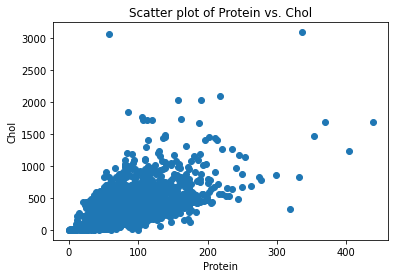

In [55]:
"""Conduct a Bivariate Analysis for Protein and Chol. What is familar about this compared to the tutorial? What is another 
way to deal with overplotting other than the Hex plot? Create two data visualizations, one that shows the overplotting, the other that 
resolves this issue. After you are done, play around with the sns.kdeplot function or try to create a 3D graph to reduce the effects of overplotting."""

x = data["Protein"]
y = data["Chol"]
plt.scatter(x, y)
plt.xlabel("Protein")
plt.ylabel("Chol")
plt.title("Scatter plot of Protein vs. Chol")

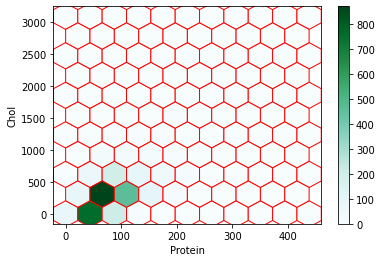

In [59]:
data.plot.hexbin(x = "Protein", y = "Chol", gridsize = 10, ec = "r", sharex=False)

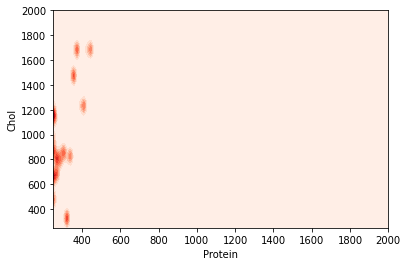

In [56]:
sns.kdeplot(data["Protein"], data["Chol"], cmap="Reds", shade=True, clip=(2000, 250))